In [6]:
import embpred
from embpred.config import DATA_DIR
import os
import matplotlib.pyplot as plt
from collections import defaultdict

In [7]:
classname_to_int =  {
        "t1": 0,
        "tPN": 1,
        "tPNf": 2,
        "t2": 3,
        "t3": 4,
        "t4": 5,
        "t5": 6,
        "t6": 7,
        "t7": 8, 
        "t8": 9,
        "tM":10,
        "tB": 11,
        "tEB": 12,
        "tEmpty": 13
    }

int_to_classname = {v: k for k, v in classname_to_int.items()}

In [24]:
def get_files_labels(fname):
    with open(fname, "r") as f:
        files = f.readlines()
    files = [file.strip() for file in files][1:]
    labels = [int(file.split(",")[-1]) for file in files]
    files = [file.strip() for file in files]
    return files, labels

In [42]:
def get_filename_no_ext(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

def get_embryo_names_by_from_files(files, labels):
    embryo_names_to_files = {}
    embryo_names_to_count = {}
    embryo_names_to_labels = {}

    for file, label in zip(files, labels):
        embryo_name = get_filename_no_ext(file).rsplit('_', 1)[0]

        if embryo_name not in embryo_names_to_files:
            embryo_names_to_files[embryo_name] = []
        embryo_names_to_files[embryo_name].append(file)

        if embryo_name not in embryo_names_to_count:
            embryo_names_to_count[embryo_name] = 0
        embryo_names_to_count[embryo_name] += 1

        if embryo_name not in embryo_names_to_labels:
            embryo_names_to_labels[embryo_name] = []
        embryo_names_to_labels[embryo_name].append(label)

    return embryo_names_to_files, embryo_names_to_count, embryo_names_to_labels

def characterize_time_stages_per_embryo(embryo_names_to_label):
    # for each embryo, then for each class name, count the number of files that belong to that class
    embryo_names_to_classname_to_count = {}
    for embryo_name, labels in embryo_names_to_label.items():
        classint_to_count = {}
        for class_int in int_to_classname:
            if class_int not in classint_to_count:
                classint_to_count[class_int] = 0
            
            for label in labels:
                if label == class_int:
                    classint_to_count[class_int] += 1

        embryo_names_to_classname_to_count[embryo_name] = classint_to_count
    return embryo_names_to_classname_to_count

In [44]:
dataset = DATA_DIR / "curr_dataset.csv"
with open(dataset, "r") as f:
    files = f.readlines()
files, labels = get_files_labels(dataset)
embryo_names_to_files, embryo_names_to_count, embryo_names_to_labels = get_embryo_names_by_from_files(files, labels)
embryo_classname_to_count = characterize_time_stages_per_embryo(embryo_names_to_labels)
embryo_classname_to_count

{'D2019.05.04_S00205_I3116_P_WELL3': {0: 42,
  1: 65,
  2: 10,
  3: 53,
  4: 0,
  5: 64,
  6: 6,
  7: 4,
  8: 50,
  9: 34,
  10: 95,
  11: 52,
  12: 82,
  13: 125},
 'D2023.03.01_S00147_I4388_P_WELL2': {0: 46,
  1: 74,
  2: 3,
  3: 59,
  4: 3,
  5: 54,
  6: 7,
  7: 6,
  8: 14,
  9: 56,
  10: 156,
  11: 92,
  12: 36,
  13: 111},
 'D2019.06.21_S00270_I3116_P_WELL4': {0: 56,
  1: 45,
  2: 11,
  3: 54,
  4: 11,
  5: 53,
  6: 4,
  7: 20,
  8: 54,
  9: 29,
  10: 108,
  11: 44,
  12: 86,
  13: 0},
 'D2023.12.12_S00103_I4886_P_WELL3': {0: 56,
  1: 81,
  2: 9,
  3: 55,
  4: 6,
  5: 55,
  6: 9,
  7: 12,
  8: 39,
  9: 105,
  10: 186,
  11: 46,
  12: 89,
  13: 92},
 'D2020.10.19_S00729_I0723_D_WELL3': {0: 38,
  1: 24,
  2: 9,
  3: 30,
  4: 1,
  5: 40,
  6: 3,
  7: 3,
  8: 47,
  9: 14,
  10: 50,
  11: 39,
  12: 45,
  13: 7},
 'D2020.11.25_S01033_I3116_P_WELL2': {0: 48,
  1: 70,
  2: 13,
  3: 60,
  4: 4,
  5: 97,
  6: 30,
  7: 3,
  8: 3,
  9: 20,
  10: 115,
  11: 37,
  12: 40,
  13: 81},
 'D2020.05.

<built-in method values of dict object at 0x14d5fd2c0>


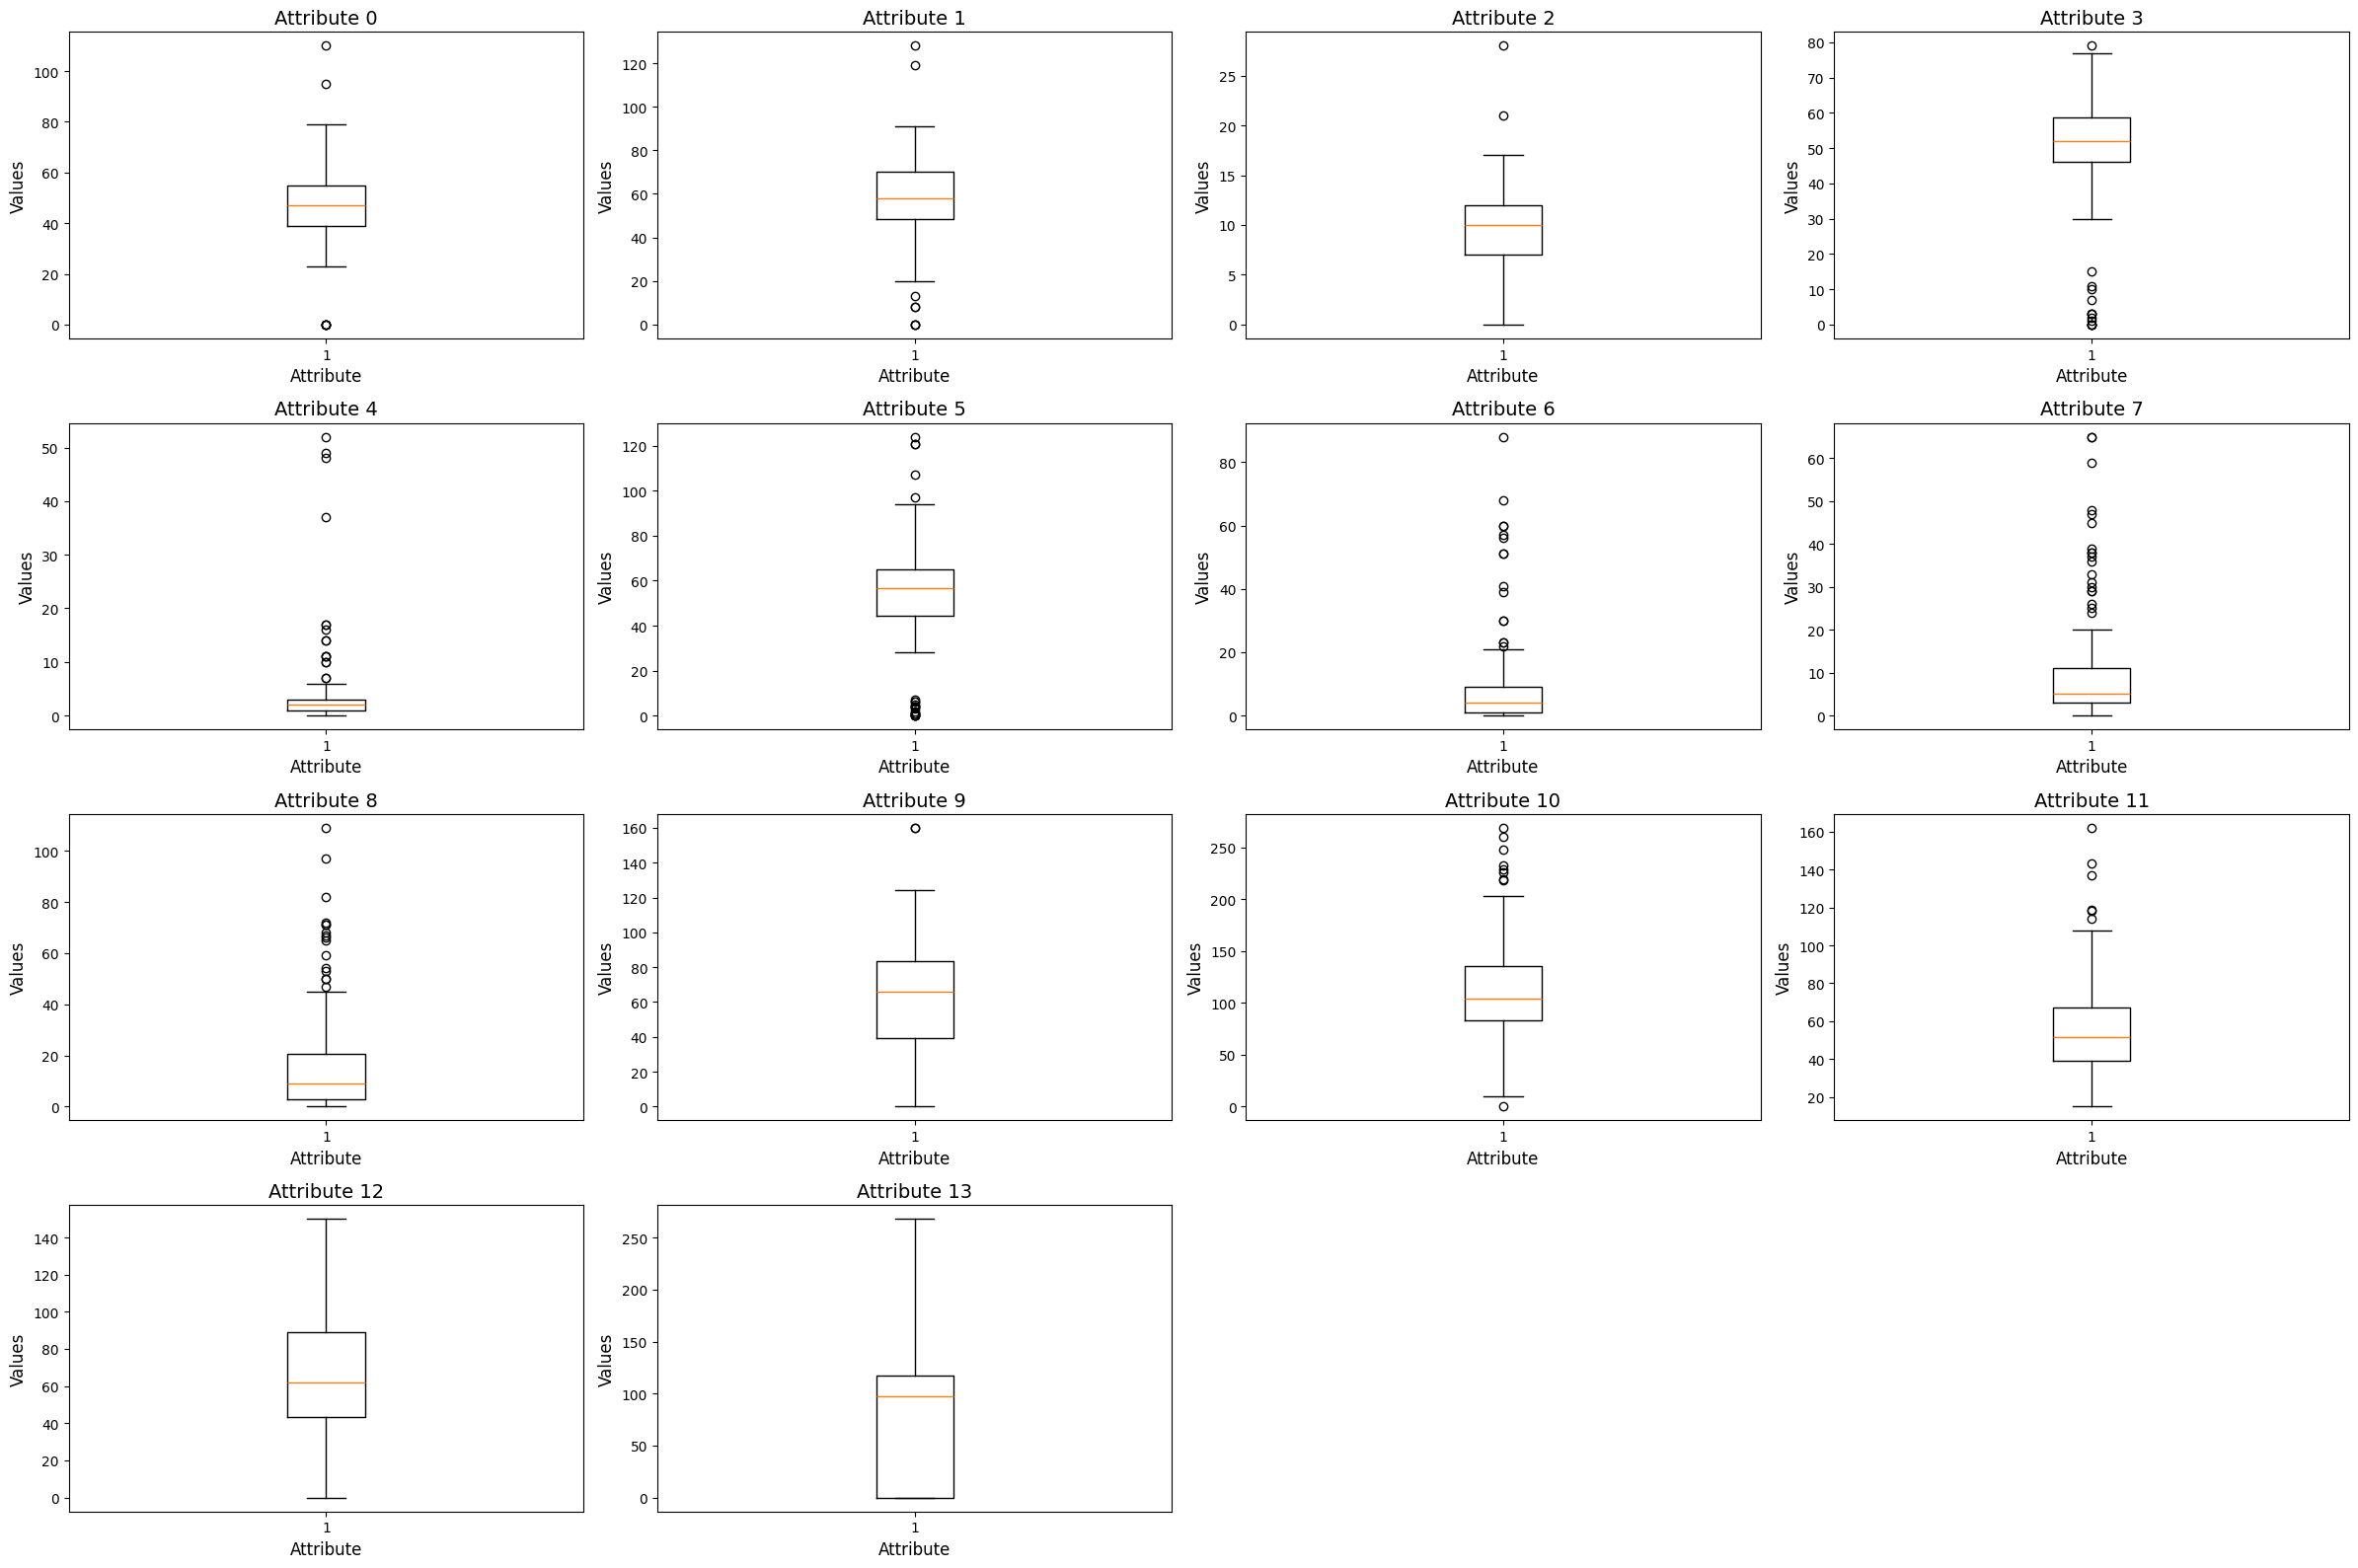

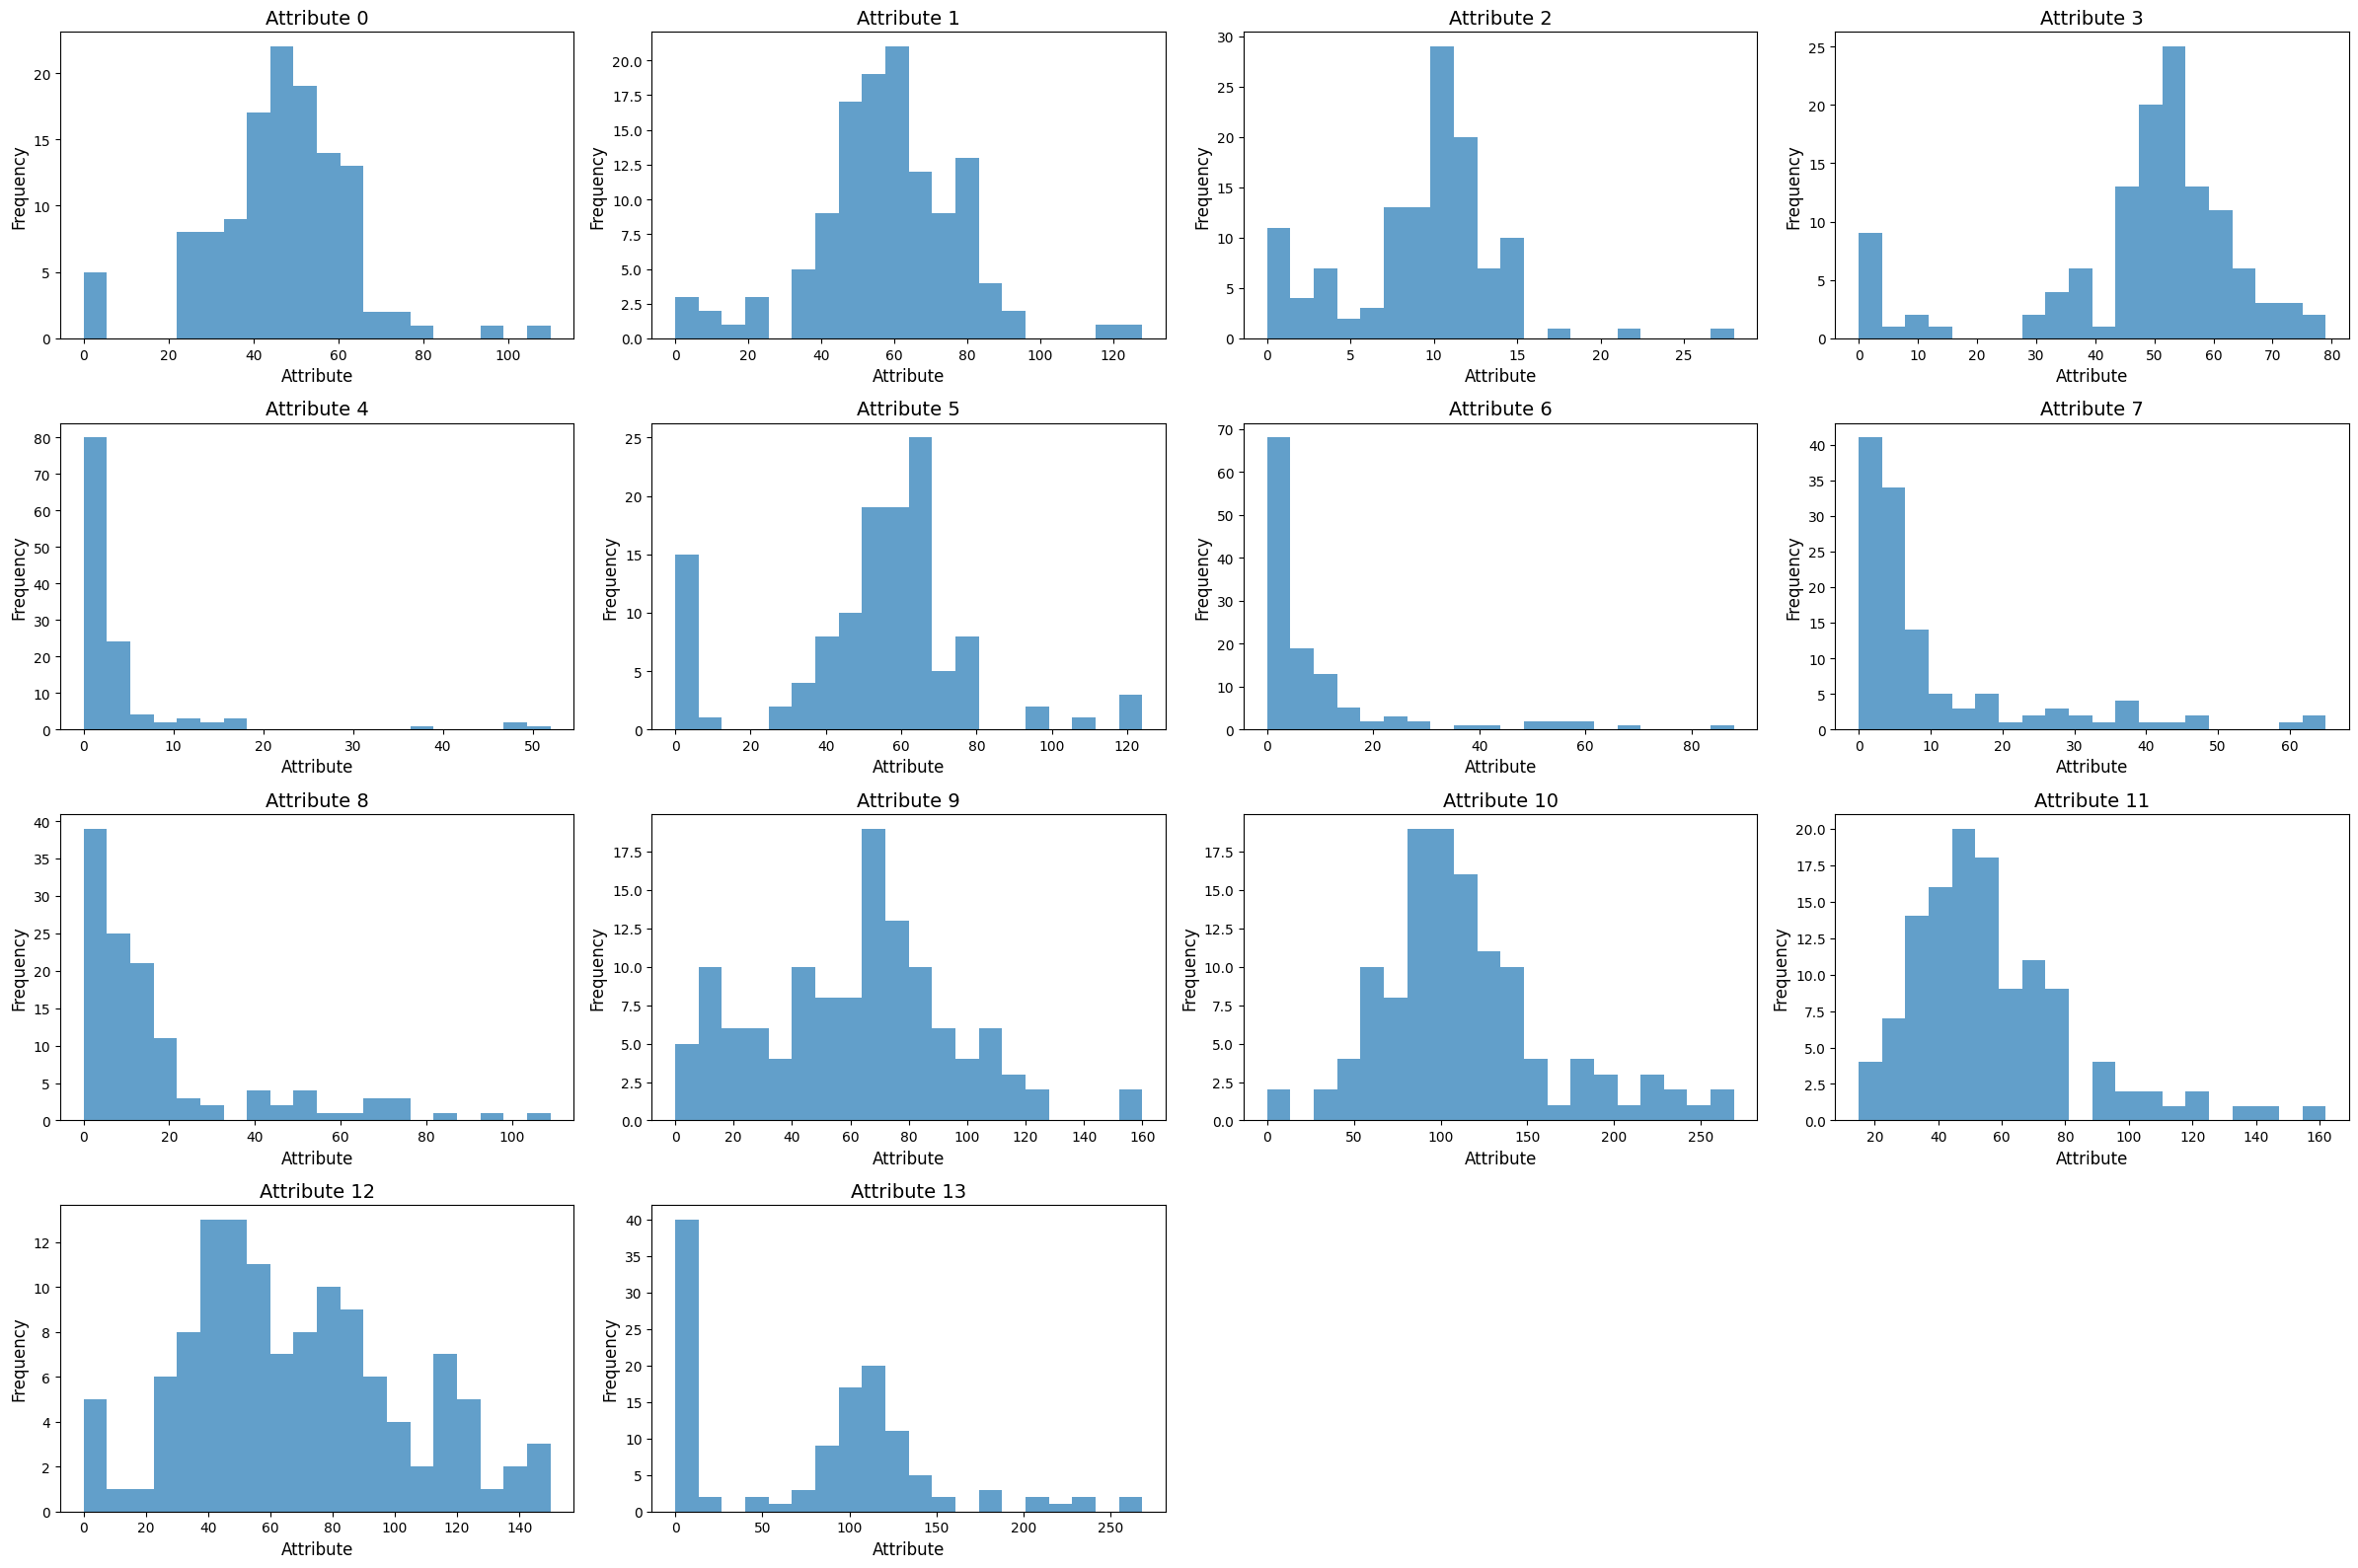

In [56]:
print(embryo_names_to_count.values)

attribute_values = {i: [] for i in range(14)}

# Populate the attribute_values dictionary
for embryo_name in embryo_classname_to_count:
    obj = embryo_classname_to_count[embryo_name]
    for attr, value in obj.items():
        attribute_values[attr].append(value)
        
# Create box plots for each attribute
fig, axs = plt.subplots(4, 4, figsize=(24, 16))  # Increase figure size and use 4x4 grid
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for i in range(14):
    axs[i].boxplot(attribute_values[i])
    axs[i].set_title(f'Attribute {i}', fontsize=14)
    axs[i].set_xlabel('Attribute', fontsize=12)
    axs[i].set_ylabel('Values', fontsize=12)

# Hide any unused subplots
for j in range(14, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Create histograms for each attribute
fig, axs = plt.subplots(4, 4, figsize=(24, 16))  # Increase figure size and use 4x4 grid
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for i in range(14):
    axs[i].hist(attribute_values[i], bins=20, alpha=0.7)
    axs[i].set_title(f'Attribute {i}', fontsize=14)
    axs[i].set_xlabel('Attribute', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)

# Hide any unused subplots
for j in range(14, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()